In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
def generate_reserve_prices(n):
    reserve_prices = np.linspace(0, 1, 100)
    normalized_reserve_prices = reserve_prices / reserve_prices.sum()
    return (np.random.choice(reserve_prices, n, p=normalized_reserve_prices) * 100) + 900


def simulate_auction(n, first_bid, second_bid):
    reserve_prices = generate_reserve_prices(n)
    n_first_bid_wins = (first_bid > reserve_prices).sum()
    first_bid_spending = n_first_bid_wins * first_bid
    reserve_prices_after_first_bid = reserve_prices[first_bid < reserve_prices]
    n_second_bid_wins = (second_bid > reserve_prices_after_first_bid).sum()
    second_bid_spending = n_second_bid_wins * second_bid
    return ((n_first_bid_wins + n_second_bid_wins) * 1000) - (first_bid_spending + second_bid_spending)

In [54]:
def find_optimal_bids(n, runs_per_combination=100):
    max_profit = -1
    optimal_bids = None
    for first_bid in tqdm(np.arange(900, 1000, 1)):
        for second_bid in np.arange(first_bid, 1000, 1):
            for _ in range(runs_per_combination):
                profit = simulate_auction(n, first_bid, second_bid)
                if profit > max_profit:
                    max_profit = profit
                    optimal_bids = (first_bid, second_bid)
    return optimal_bids, max_profit

n = 100000
optimal_bids, max_profit = find_optimal_bids(n)
print(f"Optimal bids: {optimal_bids}, Max profit: {max_profit}")

100%|██████████| 100/100 [1:36:26<00:00, 57.86s/it]

Optimal bids: (952, 978), Max profit: 2049448


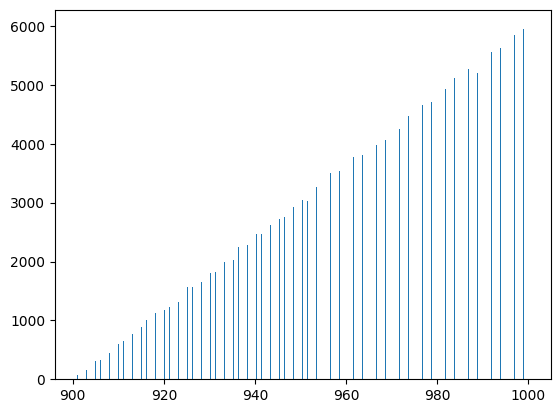

In [46]:
prices = generate_reserve_prices(300000)
#plot
plt.hist(prices, bins=1000)
plt.show()